<a href="https://colab.research.google.com/github/deepakorani/NLP_sentiment_work_from_home/blob/main/NLP_project_work_from_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALL LIBRARIES**

In [2]:

# Install Tweepy
!pip install pycountry
!pip install langdetect
!pip install textblob
!pip install tweepy

In [3]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pycountry
import os

import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'OEWX3UawsjwXhNSGBdq7Djb4Y'
consumer_api_secret = '4ybAdzoxtIDyHzFX9tq5ELoGKBihQ0CC85Ym8ebY4XXwAlnGVJ' 
access_token = '1415859356013416453-ECkzyGtR1eLrlL9Z5ut2Fa50lM9vQe'
access_token_secret ='CQuTERxSNQLEzb6wtYkZEu2suUCbrf7kYEFRz9E4hQOOJ'



In [5]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)
api = tweepy.API(authorizer, wait_on_rate_limit=True)

In [6]:
In [4]
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))


#get the tweets
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
#assign 0 pointer to positive,negative,neutral,polarity
positive  = 0
negative = 0
neutral = 0
polarity = 0
#create empty list for appending
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

#lets create a for loop to visualize each tweet
for tweet in tweets:
    
    #append the tweet into the list
    #recieve subjective and polarity statments from next line of code
    tweet_list.append(tweet.text)

    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    #define for each tweet break down of negative and positive tweets
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    #samething here
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    #neutral tweets
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

#calculate percentages
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: workfromhome
Please enter how many tweets to analyze: 2000


In [7]:
#convert these to data_frame pandas
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  855
negative number:  140
neutral number:  1005


In [8]:
tweet_list

,0
0,Check out this cool Spatter Skater Dress \n\n#...
1,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....
2,Brand Ambassador – Work at Home https://t.co/g...
3,I just listed “Engraved memories” for sale on ...
4,@rwpexpress14 Eid Mubarak to you and your fami...
...,...
1995,Knack: Customer Support Specialist https://t.c...
1996,Flip Domains for HUGE Profit!!\nPR Rage Demo R...
1997,RT @CoolMustHaves: How to Create an Online Bus...
1998,@NammaBESCOM 4th interruption since morning..R...


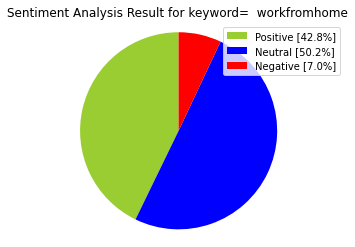

In [9]:
#quite a large number of positive reviews from work from home this was expected
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
#drop any duplicates for tweets
tweet_list.drop_duplicates(inplace = True)

In [12]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Check out this cool Spatter Skater Dress \n\n#...,Check out this cool Spatter Skater Dress \n\n#...
1,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....
2,Brand Ambassador – Work at Home https://t.co/g...,Brand Ambassador – Work at Home https://t.co/g...
3,I just listed “Engraved memories” for sale on ...,I just listed “Engraved memories” for sale on ...
4,@rwpexpress14 Eid Mubarak to you and your fami...,@rwpexpress14 Eid Mubarak to you and your fami...
...,...,...
1993,"https://t.co/kFZTg6xJGk 👆🏿👆🏿👆🏿👆🏿👆🏿💰\nFollow,li...","https://t.co/kFZTg6xJGk 👆🏿👆🏿👆🏿👆🏿👆🏿💰\nFollow,li..."
1994,RT @IrmaRaste: /WATCH/READ/ My #digitalhealth ...,RT @IrmaRaste: /WATCH/READ/ My #digitalhealth ...
1996,Flip Domains for HUGE Profit!!\nPR Rage Demo R...,Flip Domains for HUGE Profit!!\nPR Rage Demo R...
1998,@NammaBESCOM 4th interruption since morning..R...,@NammaBESCOM 4th interruption since morning..R...


In [13]:
tweet_list

,0,text
0,Check out this cool Spatter Skater Dress \n\n#...,Check out this cool Spatter Skater Dress \n\n#...
1,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....
2,Brand Ambassador – Work at Home https://t.co/g...,Brand Ambassador – Work at Home https://t.co/g...
3,I just listed “Engraved memories” for sale on ...,I just listed “Engraved memories” for sale on ...
4,@rwpexpress14 Eid Mubarak to you and your fami...,@rwpexpress14 Eid Mubarak to you and your fami...
...,...,...
1993,"https://t.co/kFZTg6xJGk 👆🏿👆🏿👆🏿👆🏿👆🏿💰\nFollow,li...","https://t.co/kFZTg6xJGk 👆🏿👆🏿👆🏿👆🏿👆🏿💰\nFollow,li..."
1994,RT @IrmaRaste: /WATCH/READ/ My #digitalhealth ...,RT @IrmaRaste: /WATCH/READ/ My #digitalhealth ...
1996,Flip Domains for HUGE Profit!!\nPR Rage Demo R...,Flip Domains for HUGE Profit!!\nPR Rage Demo R...
1998,@NammaBESCOM 4th interruption since morning..R...,@NammaBESCOM 4th interruption since morning..R...


In [14]:

#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Check out this cool Spatter Skater Dress \n\n#...,check out this cool spatter skater dress sk...
1,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....,training video link join the slack newpr...
2,Brand Ambassador – Work at Home https://t.co/g...,brand ambassador work at home driven by o...
3,I just listed “Engraved memories” for sale on ...,i just listed engraved memories for sale on ...
4,@rwpexpress14 Eid Mubarak to you and your fami...,eid mubarak to you and your family today we...
5,3 steps to creating an inclusive remote workpl...,3 steps to creating an inclusive remote workpl...
6,TRAINING VIDEO LINK\nhttps://t.co/TRWM8uLqVN\n...,training video link join the slack newpro...
7,RT @SamZemSame: #WorkFromHome จนเริ่มเข้าใจหมา...,workfromhome ...
8,#IT departments and #service desks are now cen...,it departments and service desks are now cen...
9,Working from home today as Gale Gordon as Walt...,working from home today as gale gordon as walt...


In [15]:

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(40)


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Check out this cool Spatter Skater Dress \n\n#...,check out this cool spatter skater dress sk...,0.350000,0.650000,positive,0.000,0.717,0.283,0.5754
1,RT @3broztech: TRAINING VIDEO LINK\nhttps://t....,training video link join the slack newpr...,0.000000,0.000000,positive,0.000,0.660,0.340,0.3818
2,Brand Ambassador – Work at Home https://t.co/g...,brand ambassador work at home driven by o...,0.000000,0.000000,positive,0.000,0.824,0.176,0.4588
3,I just listed “Engraved memories” for sale on ...,i just listed engraved memories for sale on ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@rwpexpress14 Eid Mubarak to you and your fami...,eid mubarak to you and your family today we...,0.000000,0.000000,positive,0.000,0.791,0.209,0.5719
5,3 steps to creating an inclusive remote workpl...,3 steps to creating an inclusive remote workpl...,-0.100000,0.200000,positive,0.000,0.804,0.196,0.2960
6,TRAINING VIDEO LINK\nhttps://t.co/TRWM8uLqVN\n...,training video link join the slack newpro...,0.000000,0.000000,positive,0.000,0.761,0.239,0.2960
7,RT @SamZemSame: #WorkFromHome จนเริ่มเข้าใจหมา...,workfromhome ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,#IT departments and #service desks are now cen...,it departments and service desks are now cen...,-0.100000,0.100000,positive,0.000,0.896,0.104,0.2732
9,Working from home today as Gale Gordon as Walt...,working from home today as gale gordon as walt...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [17]:

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


                                                      0  ... compound
21    RT @PLRsocial: 💡How To Get 1000 #Blog #Subscri...  ...  -0.2960
25    💡How To Get 1000 #Blog #Subscribers In \n30-Da...  ...  -0.2960
44    “Do not be embarrassed by your failures, learn...  ...  -0.2240
65    Give us 15 Days! The Online Business Builder C...  ...  -0.2263
95    #HybridWork is growing, but if not careful, ca...  ...  -0.7583
...                                                 ...  ...      ...
1944  How to Make Money with Network Marketing Fast ...  ...  -0.3400
1969  “Make everything as simple as possible, but no...  ...  -0.5499
1979  RT @jcafesin: JOB SUCK?\nYour BOSS an ass?\nSC...  ...  -0.7783
1994  RT @IrmaRaste: /WATCH/READ/ My #digitalhealth ...  ...  -0.1531
1998  @NammaBESCOM 4th interruption since morning..R...  ...  -0.3400

[142 rows x 9 columns]


In [18]:

#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [19]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,853,53.48
neutral,600,37.62
negative,142,8.90


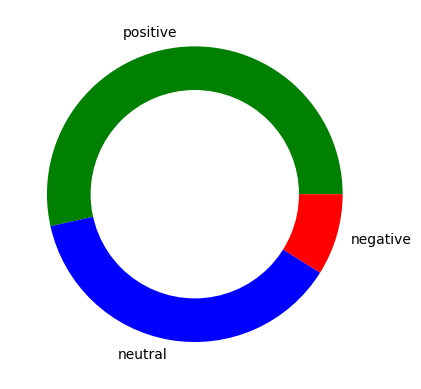

In [20]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [21]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


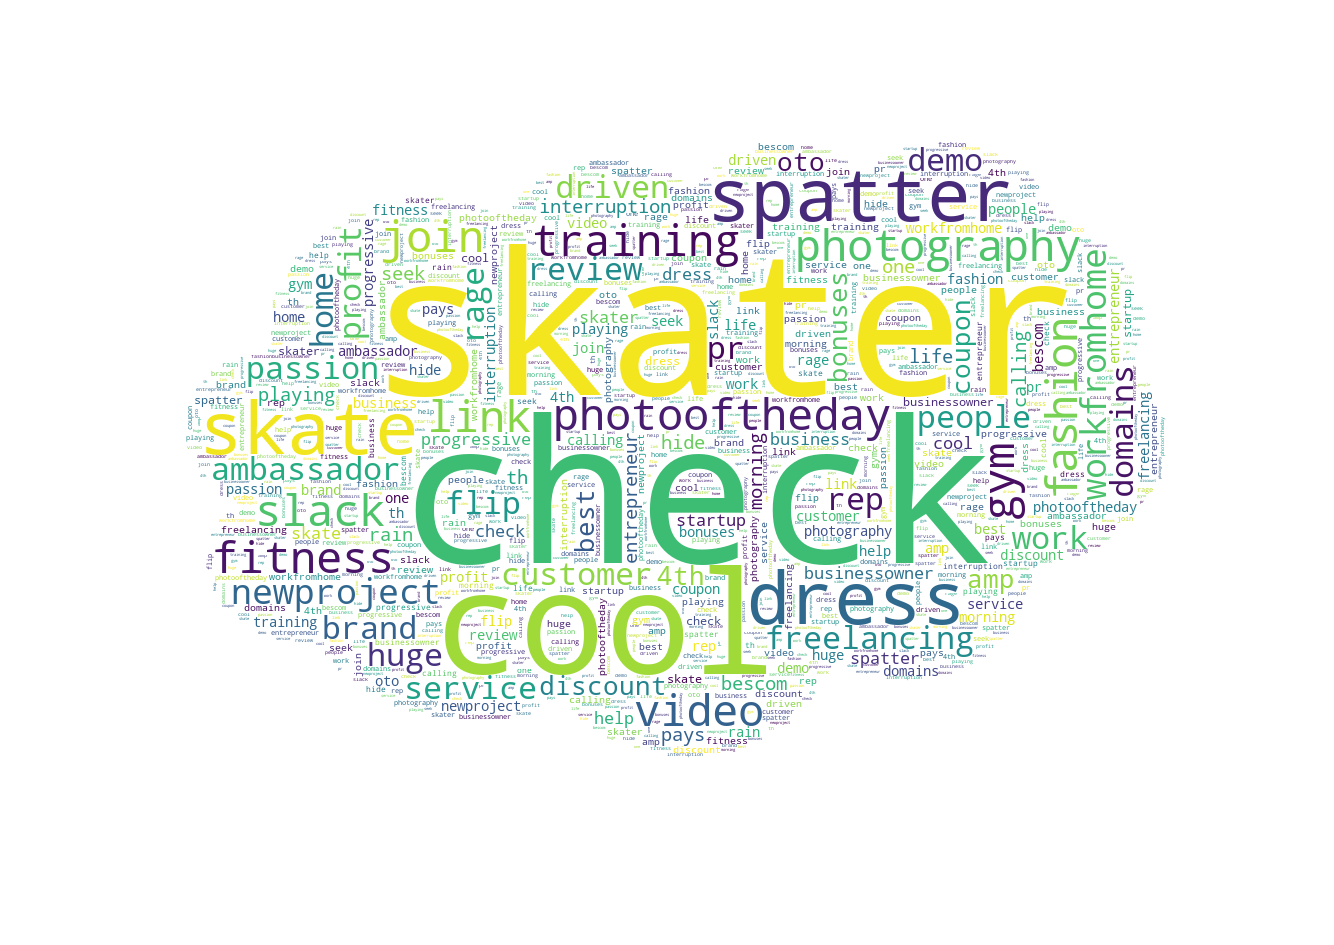

In [23]:
create_wordcloud(tw_list["text"].values)

In [24]:

#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [25]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,108.76
neutral,100.62
positive,105.66


In [26]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.38
neutral,11.87
positive,15.84


In [27]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [28]:

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [29]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [31]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [40]:

tw_list.head()
tw_list.to_csv("output.csv")

In [34]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1595 Number of reviews has 3524 words


In [35]:

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aa,aapl,abhi,abil,abl,absenc,absolut,ac,acceler,access,accessori,accomplish,accop,accord,account,accountmanagerjob,accumul,accuro,achiev,acorn,acquir,acronym,acryl,action,activ,actual,ad,adapt,add,addit,adha,adjust,admin,administr,administra,adminjob,adopt,ador,adrenalin,...,writingcommun,writinglif,wtf,wynnbet,x,xbox,xcm,xr,xtremaquatm,xwp,xx,ya,yahin,yang,yata,yatra,yay,ye,year,yet,yg,yo,yoga,york,yorkshir,young,youtub,yr,yuk,yummi,yung,zafu,zara,zazpi,zealand,zero,zone,zoo,zoom,zuo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
workfromhom,615
work,383
home,251
job,247
remot,144
get,121
remotejob,112
make,107
busi,90
nomad,85


In [37]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('work home', 101),
 ('remotejobs jobs', 83),
 ('jobs nomad', 83),
 ('nomad workfromhome', 81),
 ('workfromhome digitalnomad', 80),
 ('digitalnomad newjobs', 80),
 ('working home', 63),
 ('make money', 33),
 ('remote job', 27),
 ('workfromhome jobs', 25),
 ('workathome workfromhome', 23),
 ('home office', 23),
 ('workfromhome remote', 22),
 ('support specialist', 20),
 ('customer support', 16),
 ('medical coding', 16),
 ('workfromhome homebusiness', 15),
 ('onlinejobs workfromhome', 15),
 ('jobs onlinejobsworkfromhome', 15),
 ('onlinejobsworkfromhome onlinejob', 15)]

In [39]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('remotejobs jobs nomad', 83),
 ('jobs nomad workfromhome', 81),
 ('nomad workfromhome digitalnomad', 80),
 ('workfromhome digitalnomad newjobs', 80),
 ('onlinejobs workfromhome jobs', 15),
 ('workfromhome jobs onlinejobsworkfromhome', 15),
 ('jobs onlinejobsworkfromhome onlinejob', 15),
 ('workathome workfromhome homebusiness', 14),
 ('new remote job', 14),
 ('onlinejobsworkfromhome onlinejob virtualassistant', 14),
 ('onlinejob virtualassistant workfromhomejobs', 14),
 ('12 critical ebooks', 13),
 ('critical ebooks keys', 13),
 ('ebooks keys success', 13),
 ('keys success working', 13),
 ('success working freelancer', 13),
 ('working freelancer rebuild', 13),
 ('freelancer rebuild finances', 13),
 ('rebuild finances post', 13),
 ('finances post cv19', 13)]